## MetENP

MetENP is a R package that enables detection of significant metabolites from metabolite information 
(names or names and concentration along with metadata information) and provides

1. Enrichment score of metabolite class,
2. Maps to pathway of the species of choice,
3. Calculate enrichment score of pathways,
4. Plots the pathways and shows the metabolite increase or decrease
5. Gets gene info, reaction info, enzyme info

For more info, check out the vignette.

In [1]:
if (!requireNamespace("KEGGREST", quietly = TRUE))
    BiocManager::install("KEGGREST", update = TRUE, ask = FALSE)

if (!requireNamespace("KEGGgraph", quietly = TRUE))
    BiocManager::install("KEGGgraph", update = TRUE, ask = FALSE)

if (!requireNamespace("pathview", quietly = TRUE))
    BiocManager::install("pathview", update = TRUE, ask = FALSE)

#if (!requireNamespace("KEGG.db", quietly = TRUE))
#    BiocManager::install("KEGG.db", update = TRUE, ask = FALSE)

#if (!requireNamespace("MetENP", quietly = TRUE))
#    devtools::install("..", upgrade = "never")



##############################################################################
Pathview is an open source software package distributed under GNU General
Public License version 3 (GPLv3). Details of GPLv3 is available at
http://www.gnu.org/licenses/gpl-3.0.html. Particullary, users are required to
formally cite the original Pathview paper (not just mention it) in publications
or products. For details, do citation("pathview") within R.

The pathview downloads and uses KEGG data. Non-academic uses may require a KEGG
license agreement (details at http://www.kegg.jp/kegg/legal.html).
##############################################################################



In [2]:
USER_HOME=Sys.getenv("HOME");
.libPaths( c( .libPaths(), paste0(USER_HOME, "/.local/R") ))
#.libPaths( c( .libPaths(), paste0("../../R") )); # suitable path to where MetENP R package is installed

library(MetENP)

#### If you do not wish to install, alternatively, download from github(https://github.com/metabolomicsworkbench/MetENP) and load libraries and functions
#### Complete information for this study is at Metabolomics Workbench: https://www.metabolomicsworkbench.org/data/DRCCMetadata.php?Mode=Study&StudyID=ST002098&StudyType=MS&ResultType=1

In [3]:
data = getmwstudies('ST002098', 'data')
head(data)

analysis_id,analysis_summary,metabolite_name,metabolite_id,refmet_name,20210323-AH-3,20210323-AH-4,20210323-AH-5,20210323-AH-6,20210323-AH-7,⋯,20210323-CL-3,20210323-CL-4,20210323-CL-5,20210323-CL-6,20210323-CM-1,20210323-CM-2,20210323-CM-3,20210323-CM-4,20210323-CM-5,20210323-CM-6
<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AN003428,Reversed phase POSITIVE ION MODE,"2,4-Diaminobutyric acid",ME510729,"2,4-Diaminobutyric acid",10840.85742,11922.17188,12672.04294,15921.0172,15680.0293,⋯,7569.084643,4133.525742,7473.71896,10407.30355,5799.755372,5091.896603,4207.673633,5164.238609,5935.541912,6765.351819
AN003428,Reversed phase POSITIVE ION MODE,2-Aminoimidazole,ME510732,"2,4-Diaminobutyric acid",2085.572673,1982.2024,3919.908306,2599.20658,2768.204018,⋯,968.5647628,1053.525983,830.2979535,223.8377798,930.5521656,1002.008461,375.2534196,1187.913374,629.4166329,2288.848004
AN003428,Reversed phase POSITIVE ION MODE,2-Methylhippuric acid,ME510794,2-Methylhippuric acid,7851.766397,6396.563723,3699.305063,7300.175726,7129.947021,⋯,9690.788291,11681.43945,10631.09995,12462.04692,6791.03549,8326.324444,8074.355809,8118.634207,11036.59539,5339.803428
AN003428,Reversed phase POSITIVE ION MODE,3-Guanidinopropionic acid?,ME510778,3-Guanidinopropanoic acid,3613.717008,4727.369102,2903.957874,4195.700999,2750.593019,⋯,3406.785731,3130.083063,2145.722988,2047.387567,3123.420177,3437.072424,2971.632131,3175.117043,2816.206315,4327.079847
AN003428,Reversed phase POSITIVE ION MODE,3-Phenylpropionylglycine,ME510735,3-Phenylpropionylglycine,14969.17913,9664.77269,4600.65381,7432.97188,18297.72844,⋯,92224.47469,42969.81875,77020.44851,52161.7001,51073.00685,68595.00182,28720.33386,23541.79955,12487.23687,1444.109722
AN003428,Reversed phase POSITIVE ION MODE,5-aminosalicylic acid,ME510775,3-Phenylpropionylglycine,165789.0873,148345.8781,129047.7277,176141.4409,110740.2686,⋯,110952.6723,85873.93832,94458.11091,84485.13475,81274.68189,86779.40913,66244.64732,79890.03098,82645.32914,108768.1811


In [4]:
metadata = getmwstudies('ST002098', 'factors')
head(metadata)

,study_id,local_sample_id,subject_type,factors,Treatment
,<named list>,<named list>,<named list>,<named list>,<chr>
1,ST002098,20210323-C-1,Mammal,Treatment:3 times per week with 4 consecutive respectively intraperitoneal injection (10 mL/kg of olive oil),3 times per week with 4 consecutive respectively intraperitoneal injection (10 mL/kg of olive oil)
2,ST002098,20210323-C-2,Mammal,Treatment:3 times per week with 4 consecutive respectively intraperitoneal injection (10 mL/kg of olive oil),3 times per week with 4 consecutive respectively intraperitoneal injection (10 mL/kg of olive oil)
3,ST002098,20210323-C-4,Mammal,Treatment:3 times per week with 4 consecutive respectively intraperitoneal injection (10 mL/kg of olive oil),3 times per week with 4 consecutive respectively intraperitoneal injection (10 mL/kg of olive oil)
4,ST002098,20210323-C-5,Mammal,Treatment:3 times per week with 4 consecutive respectively intraperitoneal injection (10 mL/kg of olive oil),3 times per week with 4 consecutive respectively intraperitoneal injection (10 mL/kg of olive oil)
5,ST002098,20210323-C-7,Mammal,Treatment:3 times per week with 4 consecutive respectively intraperitoneal injection (10 mL/kg of olive oil),3 times per week with 4 consecutive respectively intraperitoneal injection (10 mL/kg of olive oil)
6,ST002098,20210323-C-8,Mammal,Treatment:3 times per week with 4 consecutive respectively intraperitoneal injection (10 mL/kg of olive oil),3 times per week with 4 consecutive respectively intraperitoneal injection (10 mL/kg of olive oil)


Find the factors you would want to compare
Multiple factors (independent variables) are formatted in multiple columns but you can get information on all the factors by "factors" column, such as 'TreatmentGroup:Prednisolone', this indicates column name 'TreatmentGroup' with factor Prednisolone. For t-test use the factors in the same column. For comparing multipe independent variables use anova by anova_ana function.


### Associate metabolomics data to the refmet class


In [5]:

refmet_class= convert_refmet(data)
head(refmet_class)

,metabolite_name,analysis_id,analysis_summary,metabolite_id,refmet_name,20210323-AH-3,20210323-AH-4,20210323-AH-5,20210323-AH-6,20210323-AH-7,⋯,20210323-CM-1,20210323-CM-2,20210323-CM-3,20210323-CM-4,20210323-CM-5,20210323-CM-6,formula,super_class,main_class,sub_class
,<chr>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2-Aminoimidazole,AN003428,Reversed phase POSITIVE ION MODE,ME510732,"2,4-Diaminobutyric acid",2085.572673,1982.2024,3919.908306,2599.20658,2768.204018,⋯,930.5521656,1002.008461,375.2534196,1187.913374,629.4166329,2288.848004,NA,NA,NA,NA
2,2-hydroxy-2-phenylpropanoic acid,AN003429,Reversed phase NEGATIVE ION MODE,ME510826,Uracil,38949.48133,38464.4843,40153.18329,48465.71807,37144.12682,⋯,18381.7963,19682.33461,18793.63047,17050.4329,20334.9115,21571.05911,NA,NA,NA,NA
3,2-Ketoglutaric acid,AN003429,Reversed phase NEGATIVE ION MODE,ME510814,Oxoglutaric acid,11632.51619,25174.21827,8181.163544,18696.44463,6579.957987,⋯,13679.84425,19604.99632,14433.91838,17125.38377,9412.532671,10834.14702,C5H6O5,Organic acids,TCA acids,TCA acids
4,2-Methylhippuric acid,AN003428,Reversed phase POSITIVE ION MODE,ME510794,2-Methylhippuric acid,7851.766397,6396.563723,3699.305063,7300.175726,7129.947021,⋯,6791.03549,8326.324444,8074.355809,8118.634207,11036.59539,5339.803428,C10H11NO3,Benzenoids,Benzamides,Hippuric acids
5,"2,4-Diaminobutyric acid",AN003428,Reversed phase POSITIVE ION MODE,ME510729,"2,4-Diaminobutyric acid",10840.85742,11922.17188,12672.04294,15921.0172,15680.0293,⋯,5799.755372,5091.896603,4207.673633,5164.238609,5935.541912,6765.351819,C4H10N2O2,Fatty Acyls,Fatty acids,Amino FA
6,3-Guanidinopropionic acid?,AN003428,Reversed phase POSITIVE ION MODE,ME510778,3-Guanidinopropanoic acid,3613.717008,4727.369102,2903.957874,4195.700999,2750.593019,⋯,3123.420177,3437.072424,2971.632131,3175.117043,2816.206315,4327.079847,C4H9N3O2,Organic nitrogen compounds,Guanidines,Guanidines


In [6]:
unique(metadata$factors)


[[1]]
[1] "Treatment:3 times per week with 4 consecutive respectively intraperitoneal injection (10 mL/kg of olive oil)"

[[2]]
[1] "Treatment:3 times per week with 4 consecutive respectively intraperitoneal injection with 10% CCl4 (10 mL/kg of olive oil)"

[[3]]
[1] "Treatment:3 times per week with 4 consecutive respectively intraperitoneal injection with 1% CCl4 (10 mL/kg of olive oil)"

[[4]]
[1] "Treatment:3 times per week with 4 consecutive respectively intraperitoneal injection with 5% CCl4 (10 mL/kg of olive oil)"

[[5]]
[1] "Treatment:Only intraperitoneally (i.p) injected with 1% CCl4 (10 mL/kg, dissolved in olive oil) at the 12th injection. During the previous 11 times they were treated the same as the healthy controls with an equal volume of olive oil."

[[6]]
[1] "Treatment:Only intraperitoneally (i.p) injected with 5% CCl4 (10 mL/kg, dissolved in olive oil) at the 12th injection. During the previous 11 times they were treated the same as the healthy controls with an equal volume of olive oil."

In [7]:
### Find the analysis mode
unique(data$analysis_summary)

[[1]]
[1] "Reversed phase POSITIVE ION MODE"

[[2]]
[1] "Reversed phase NEGATIVE ION MODE"

### Find significant metabolites, run significance of all the analysis summary together. The analysis summary/modes you got in the previous section
There is a normalization step which takes into account missing values, and this can be achieved via three methods:

1) half_of_min: where the NAs are replaced by half of min values in the data

2) remove_NAs: where Cols with NAs values are removed

3) 50percent: where cols with more than 50% NAs values are removed

half_of_min is ideal when you wish to see which metabolites were present in either group. Very high fold change would mean it was present in either group. 

In [8]:
stats_metabolites = significant_met(metabolomics_data=refmet_class, met_col="metabolite_name",analysis_type=c('Reversed phase POSITIVE ION MODE'), metadata=metadata, factor1='3 times per week with 4 consecutive respectively intraperitoneal injection (10 mL/kg of olive oil)', factor2=c('3 times per week with 4 consecutive respectively intraperitoneal injection with 10% CCl4 (10 mL/kg of olive oil)'), factor_col='Treatment',sample_col='local_sample_id', p_adjust='fdr',normalization="50percent")

sig_metabolites = stats_metabolites[which(stats_metabolites[,"pval"] <= 0.05&abs(stats_metabolites[,"log2Fold_change"])>0.5),]


Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


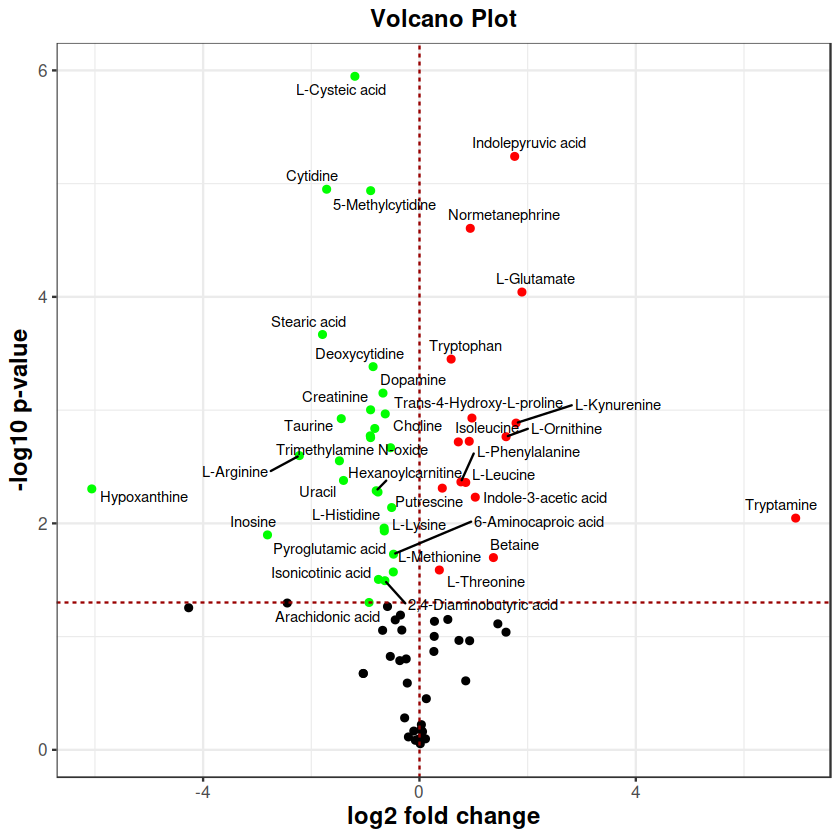

In [9]:
plot_volcano(stats_metabolites, thres_pval= 0.05,thres_log2foldchange = 0.0, TRUE)

### Map metabolite class of the significant metabolites utilzing refmet classification in Metabolomics Workbench
This function not only maps metabolite to metabolite class but also to external databases such as pubchem, inchi key, smiles and kegg

In this example, we will go forward with significant metabolite obtained by t-test/

In [10]:

sig_metabolites_kegg_id= map_keggid(sig_metabolites)

#### Check all your significant metabolites have not been assigned metabolite class

In [11]:
setdiff(sig_metabolites$refmet_name, sig_metabolites_kegg_id$refmet_name)

character(0)

### Count metabolites in each of the metabolite class and plotting
You may choose from sub_class, main_class and super_class

In [12]:
count_changes = metcountplot(df_metclass=sig_metabolites_kegg_id, metclass='sub_class', plotting=TRUE, thres_logfC = 0.0)


Warning message:
“Use of `count_changes[[metclass]]` is discouraged. Use `.data[[metclass]]` instead.”


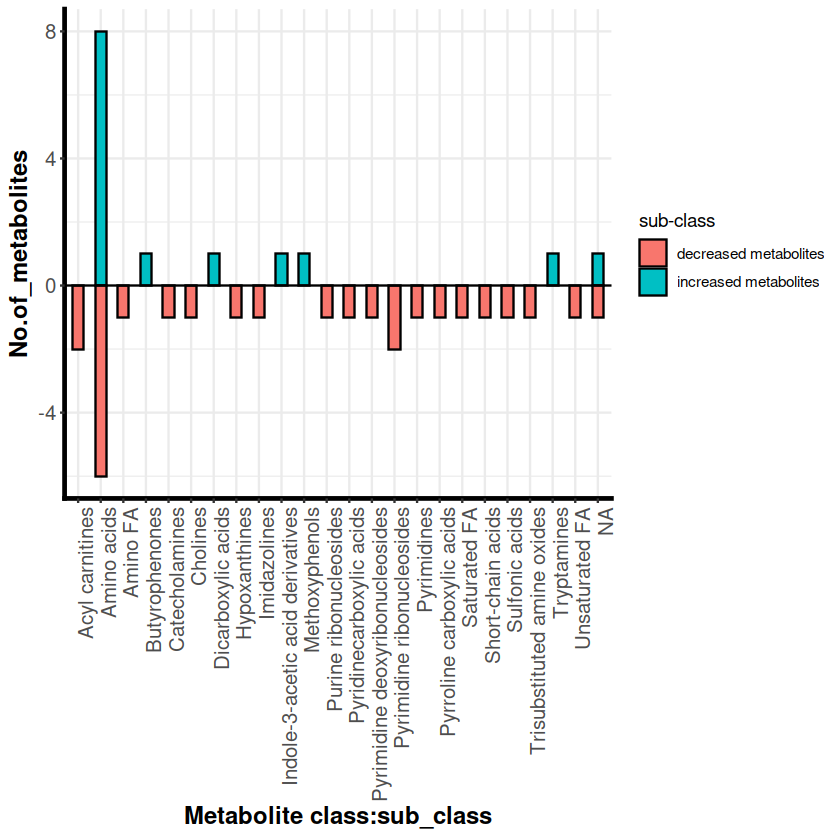

In [13]:
count_changes$plotimg

### Enrichment class score

Calculate the enrichment score of each metabolite class. Enrichment score is calculated through hypergeometric method. One can specify the no. of significant metabolites in a class while calculating the enrichment score. We advice to use the number of mtabolites in each class as 3 or more. But if someone just wants to know the enrichment score and rest of the information of all the metabolites, then they can choose the number as 1.

In [14]:
metenrichment = metclassenrichment(df_metclass=sig_metabolites_kegg_id,refmet_class, metclass="sub_class",enrich_stats="HG",no=1)

#### Plot the enrichment score via function plot_met_enrichment

Warning message:
“Use of `metclass_stats[[metclass]]` is discouraged. Use `.data[[metclass]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged. Use `.data[[enrich_stats]]` instead.”
Warning message:
“Use of `metclass_stats[[enrich_stats]]` is discouraged. Use `.data[[enrich_stats]]` instead.”


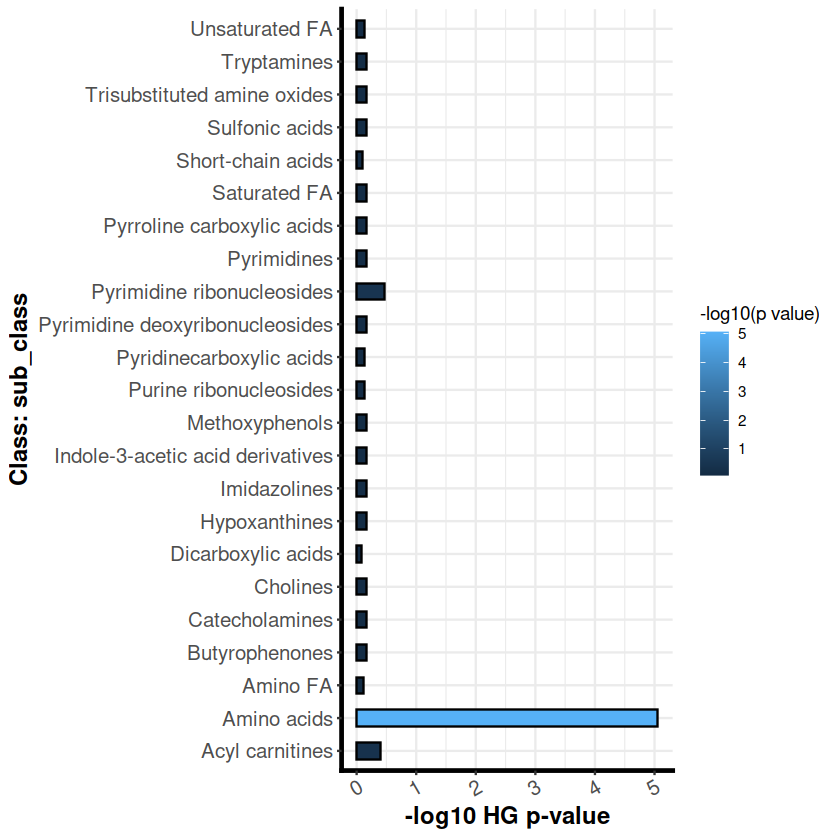

In [15]:
plot_met_enrichment(metenrichment, "sub_class","HG", no=1)

### Check the pathways with reactions of all the significant metabolites

In [16]:
met_path = met_pathways(df_metenrichment = metenrichment, 'hsa')
head(met_path)

,rxn,refmet_name,Exact mass,KEGG ID,Metabolite,3 times per week with 4 consecutive respectively intraperitoneal injection (10 mL/kg of olive oil)_mean,3 times per week with 4 consecutive respectively intraperitoneal injection with 10% CCl4 (10 mL/kg of olive oil)_mean,Fold_change,log2Fold_change,t_value,⋯,metabolite_id,super_class,main_class,sub_class,formula,HG p-value,Rxn_name,PATHWAY,pathway_id,sps_path_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<named list>,<chr>,<chr>,<chr>,<chr>,<dbl>,<named list>,<chr>,<chr>,<chr>
1,R00021,Glutamine,146.0691,C00064,L-Glutamine,212880.6,113826.2,0.534695,-0.9032118,4.231851,⋯,ME510805,Organic acids,Amino acids and peptides,Amino acids,C5H10N2O3,8.871458e-06,L-glutamate:ferredoxin oxidoreductase (transaminating),Glyoxylate and dicarboxylate metabolism,rn00630,hsa00630
2,R00021,Glutamine,146.0691,C00064,L-Glutamine,212880.6,113826.2,0.534695,-0.9032118,4.231851,⋯,ME510805,Organic acids,Amino acids and peptides,Amino acids,C5H10N2O3,8.871458e-06,L-glutamate:ferredoxin oxidoreductase (transaminating),Nitrogen metabolism,rn00910,hsa00910
3,R00021,Glutamic acid,147.0532,C00025,L-Glutamate,24428.58,90833.51,3.718330,1.8946546,-6.557328,⋯,ME510750,Organic acids,Amino acids and peptides,Amino acids,C5H9NO4,8.871458e-06,L-glutamate:ferredoxin oxidoreductase (transaminating),Glyoxylate and dicarboxylate metabolism,rn00630,hsa00630
4,R00021,Glutamic acid,147.0532,C00025,L-Glutamate,24428.58,90833.51,3.718330,1.8946546,-6.557328,⋯,ME510750,Organic acids,Amino acids and peptides,Amino acids,C5H9NO4,8.871458e-06,L-glutamate:ferredoxin oxidoreductase (transaminating),Nitrogen metabolism,rn00910,hsa00910
5,R00093,Glutamic acid,147.0532,C00025,L-Glutamate,24428.58,90833.51,3.718330,1.8946546,-6.557328,⋯,ME510750,Organic acids,Amino acids and peptides,Amino acids,C5H9NO4,8.871458e-06,L-glutamate:NAD+ oxidoreductase (transaminating),"Alanine, aspartate and glutamate metabolism",rn00250,hsa00250
6,R00093,Glutamic acid,147.0532,C00025,L-Glutamate,24428.58,90833.51,3.718330,1.8946546,-6.557328,⋯,ME510750,Organic acids,Amino acids and peptides,Amino acids,C5H9NO4,8.871458e-06,L-glutamate:NAD+ oxidoreductase (transaminating),Nitrogen metabolism,rn00910,hsa00910


Find metabolites for which no pathways were registered in Kegg and/or no kegg id was found

In [17]:
setdiff(metenrichment$Metabolite,unique(met_path$Metabolite))

[1] "5-Methylcytidine"  "Acetylcarnitine"   "Hexanoylcarnitine"

### Get pathway enrichment sore.

Once we have the pathway information, we can calculate enrichment score of pathways. Again, here i have used hypergeometric score. For hypergeometric score, we need to know the total number of kegg compounds that are linked to kegg pathways. 
N = total no. of cmpds linked to kegg pathway (this is the step which might take long), so I advice to run the script comp_linkedto_pathways() just the first time or after 6 months or so if desired to run the pipeline again. save the result from comp_linkedto_pathways() and load it. Loading from saved file would save time for another analysis with another study. However the package takes care of loading. Save the data in the data folder.

L = No. of cmpds in a pathway
M= no. of altered cmpds in a pathway
K =  total no. of altered cmpds
phyper(M,L, N-L, K)


This function also utilizes korg dataset from pathview package.

In [18]:
load('../data/ls_path.RData')
load('../data/korg.RData')
kegg_es = path_enrichmentscore(met_path,sig_metabolite_kegg_id=sig_metabolite_kegg_id,ls_path=ls_path,refmet_class=refmet_class,sps='hsa',padj='BH', kegg_comp_path=FALSE)

Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”
Warning message in phyper(M - 1, L, N - L, k, lower.tail = FALSE):
“NaNs produced”


In [19]:
head(kegg_es)

,Pathway name,No.of mets in study,Total_no._of_comps_in_pathway,pathway_HG p-value,Padjust
,<fct>,<int>,<int>,<dbl>,<dbl>
1,"Alanine, aspartate and glutamate metabolism",3,28,0.9999853,1
2,Amino sugar and nucleotide sugar metabolism,3,118,NaN,NaN
3,Aminoacyl-tRNA biosynthesis,9,52,0.9999998,1
4,Arachidonic acid metabolism,2,75,1.0000000,1
5,Arginine and proline metabolism,6,72,1.0000000,1
6,Arginine biosynthesis,4,23,0.9977626,1


### Plot pathway network
Only plotting significant pathways (pathway with p-value significance).

The pathway network is such that it shows metabolites that are connected to different pathways and same metabolite in different pathway. Color of nodes of metabolites are according to the fold change of metabolites (low expression in green and high in red) and size of pathway nodes (square nodes) are according to the number of branches (meaning no of metabolites). All metabolite are written in blue

Warning message:
“ggrepel: 29 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


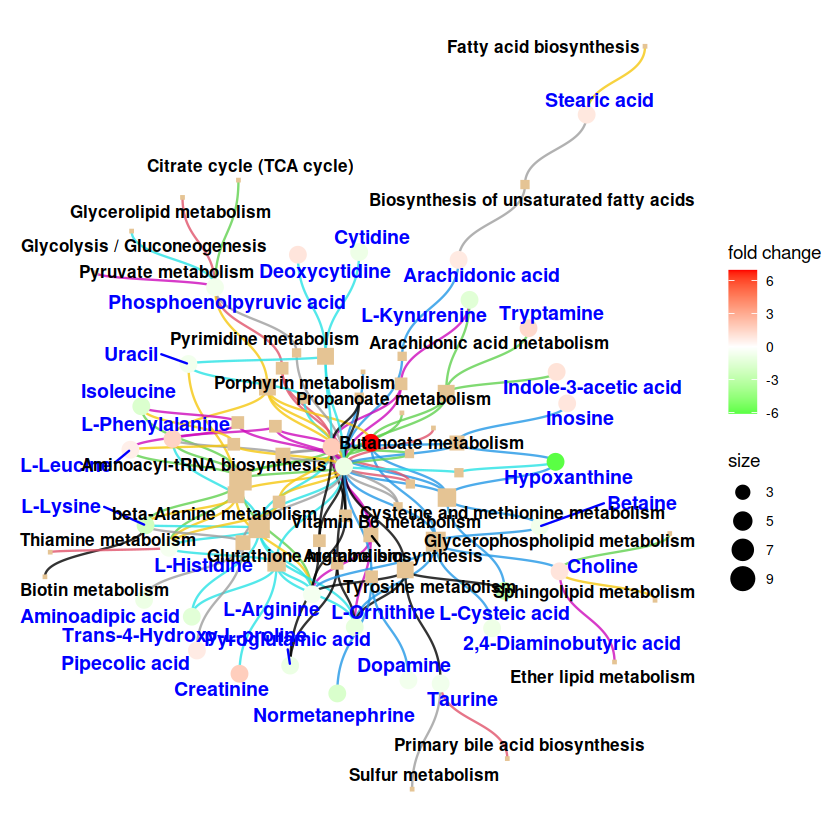

In [20]:
plot_pathway_networks (met_path,kegg_es, TRUE)

### Heatmap

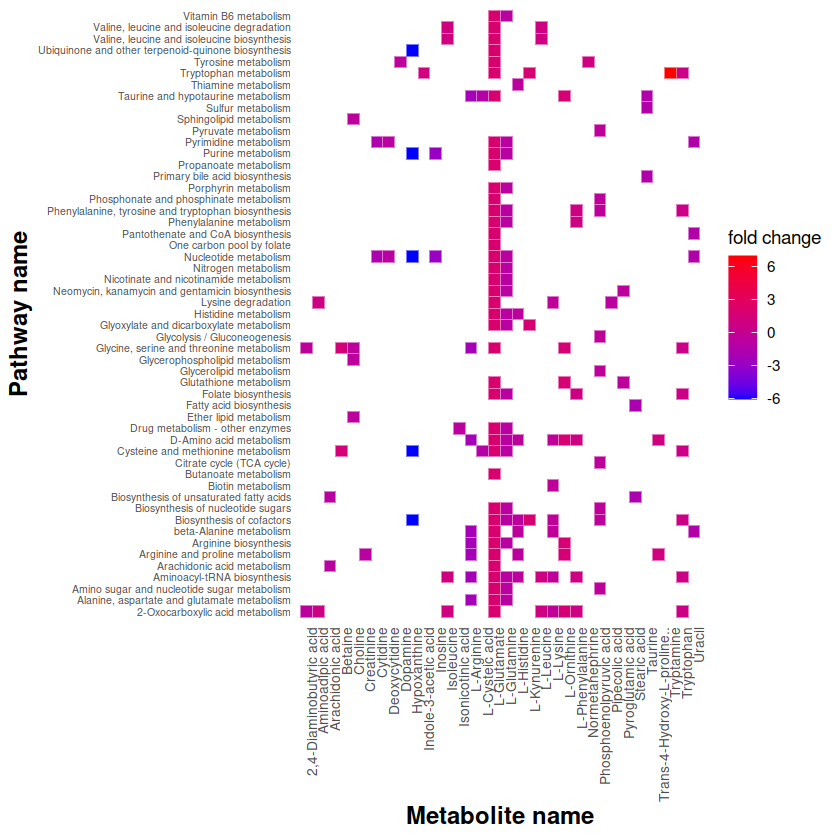

In [21]:
plot_heatmap(met_path, shorten_name=TRUE,refmet_name=FALSE, xaxis=8, yaxis=6)

### Dotplot

Warning message:
“Use of `significant_pathways[["pathway_HG p-value"]]` is discouraged. Use `.data[["pathway_HG p-value"]]` instead.”


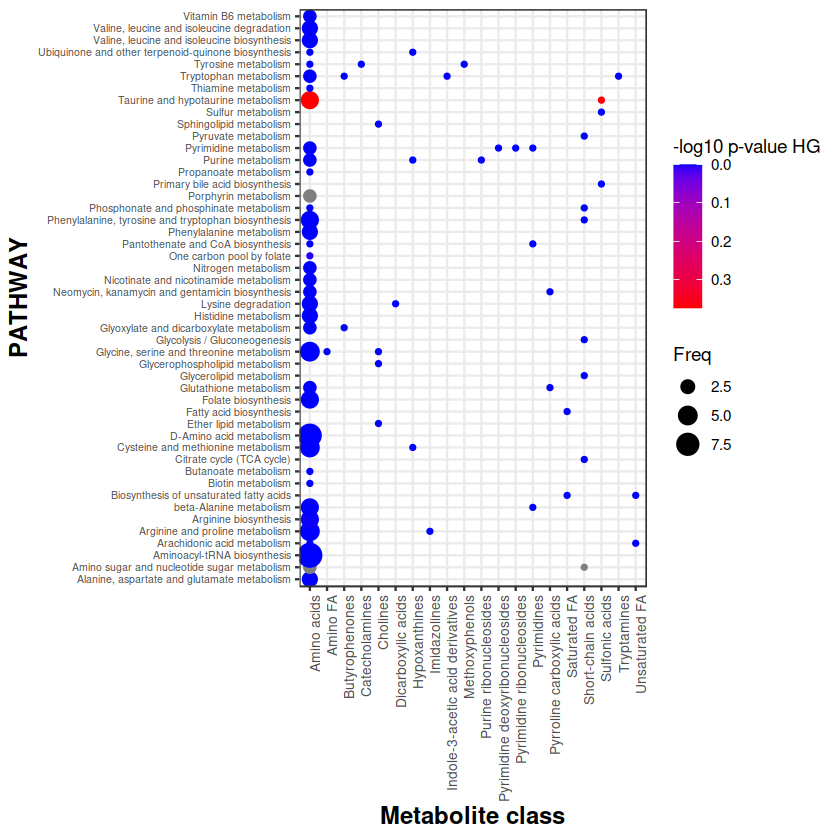

In [22]:

dotplot_met_class_path (met_path, kegg_es,"sub_class",xaxis=8,yaxis=6)

### Get the gene and enzyme info

Here we get the information of genes involved in enriched pathways for specified organism

In [23]:
met_gene_info = enzyme_gene_info (metenrichment, "hsa","sub_class")
head(met_gene_info)

,orthology_id,ORTHOLOGY,gene_id,gene_name,ORGANISM,PATHWAY,DBLINKS,MOTIF,rxn,Metabolite,KEGG ID,sub_class,Rxn_name,RCLASS,EQUATION,EQUATION_more,ENZYME
,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>
1,K00106,xanthine dehydrogenase/oxidase [EC:1.17.1.4 1.17.3.2],7498,(RefSeq) xanthine dehydrogenase,Homo sapiens (human),"Purine metabolism , Caffeine metabolism , Drug metabolism - other enzymes, Metabolic pathways , Nucleotide metabolism , Peroxisome","NCBI-GeneID: 7498 , NCBI-ProteinID: NP_000370, OMIM: 607633 , HGNC: 12805 , Ensembl: ENSG00000158125 , Vega: OTTHUMG00000099385 , Pharos: P47989(Tclin) , UniProt: P47989",Pfam: MoCoBD_1 MoCoBD_2 FAD_binding_5 Ald_Xan_dh_C Fer2_2 CO_deh_flav_C Fer2 DHODB_Fe-S_bind,R01768,Hypoxanthine,C00262,Hypoxanthines,hypoxanthine:NAD+ oxidoreductase,"RC00001 C00003_C00004, RC00143 C00262_C00385",C00262 + C00003 + C00001 <=> C00385 + C00004 + C00080,Hypoxanthine + NAD+ + H2O <=> Xanthine + NADH + H+,1.17.1.4
2,K00106,xanthine dehydrogenase/oxidase [EC:1.17.1.4 1.17.3.2],7498,(RefSeq) xanthine dehydrogenase,Homo sapiens (human),"Purine metabolism , Caffeine metabolism , Drug metabolism - other enzymes, Metabolic pathways , Nucleotide metabolism , Peroxisome","NCBI-GeneID: 7498 , NCBI-ProteinID: NP_000370, OMIM: 607633 , HGNC: 12805 , Ensembl: ENSG00000158125 , Vega: OTTHUMG00000099385 , Pharos: P47989(Tclin) , UniProt: P47989",Pfam: MoCoBD_1 MoCoBD_2 FAD_binding_5 Ald_Xan_dh_C Fer2_2 CO_deh_flav_C Fer2 DHODB_Fe-S_bind,R01769,Hypoxanthine,C00262,Hypoxanthines,Hypoxanthine:oxygen oxidoreductase,"RC00143 C00262_C00385, RC02755 C00007_C00027",C00262 + C00007 + C00001 <=> C00385 + C00027,Hypoxanthine + Oxygen + H2O <=> Xanthine + Hydrogen peroxide,1.17.3.2
3,K00108,choline dehydrogenase [EC:1.1.99.1],55349,(RefSeq) choline dehydrogenase,Homo sapiens (human),"Glycine, serine and threonine metabolism, Metabolic pathways","NCBI-GeneID: 55349 , NCBI-ProteinID: NP_060867, HGNC: 24288 , Ensembl: ENSG00000016391 , Vega: OTTHUMG00000158281 , Pharos: Q8NE62(Tbio) , UniProt: Q8NE62",Pfam: GMC_oxred_N GMC_oxred_C Lycopene_cycl FAD_binding_2 DAO NAD_binding_8 Pyr_redox_2 ApbA,R01025,Choline,C00114,Cholines,choline:acceptor 1-oxidoreductase,RC00087 C00114_C00576,C00114 + C00028 <=> C00576 + C00030,Choline + Acceptor <=> Betaine aldehyde + Reduced acceptor,1.1.99.1
4,K00128,aldehyde dehydrogenase (NAD+) [EC:1.2.1.3],217,(RefSeq) aldehyde dehydrogenase 2 family member,Homo sapiens (human),"Glycolysis / Gluconeogenesis , Ascorbate and aldarate metabolism , Fatty acid degradation , Valine, leucine and isoleucine degradation, Lysine degradation , Arginine and proline metabolism , Histidine metabolism , Tryptophan metabolism , beta-Alanine metabolism , Glycerolipid metabolism , Pyruvate metabolism , Pantothenate and CoA biosynthesis , Metabolic pathways , Biosynthesis of cofactors , Alcoholic liver disease","NCBI-GeneID: 217 , NCBI-ProteinID: NP_000681 , OMIM: 100650 , HGNC: 404 , Ensembl: ENSG00000111275 , Vega: OTTHUMG00000169603 , Pharos: P05091(Tclin) , UniProt: P05091 A0A384NPN7",Pfam: Aldedh DUF1235,R02678,Indole-3-acetic acid,C00954,Indole-3-acetic acid derivatives,Indole-3-acetaldehyde:NAD+ oxidoreductase,"RC00001 C00003_C00004, RC00080 C00637_C00954",C00637 + C00003 + C00001 <=> C00954 + C00004 + C00080,Indole-3-acetaldehyde + NAD+ + H2O <=> Indole-3-acetate + NADH + H+,1.2.1.3
5,K00128,aldehyde dehydrogenase (NAD+) [EC:1.2.1.3],219,(RefSeq) aldehyde dehydrogenase 1 family member B1,Homo sapiens (human),"Glycolysis / Gluconeogenesis , Ascorbate and aldarate metabolism , Fatty acid degradation , Valine, leucine and isoleucine degradation, Lysine degradation , Arginine and proline metabolism , Histidine metabolism , Tryptophan metabolism , beta-Alanine metabolism , Glycerolipid metabolism , Pyruvate metabolism , Pantothenate and CoA biosynthesis , Metabolic pathways , Biosynthesis of

#### Get the information if metabolite is a reactant or substrate

In [24]:
rclass_info = react_substrate(met_gene_info)
head(rclass_info)

,orthology_id,ORTHOLOGY,gene_id,gene_name,ORGANISM,PATHWAY,DBLINKS,MOTIF,rxn,Metabolite,KEGG ID,sub_class,Rxn_name,RCLASS,EQUATION,EQUATION_more,ENZYME,reactant_product
,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>,<chr>,<chr>,<chr>,<named list>,<named list>,<named list>,<named list>,<named list>,<chr>
1,K00106,xanthine dehydrogenase/oxidase [EC:1.17.1.4 1.17.3.2],7498,(RefSeq) xanthine dehydrogenase,Homo sapiens (human),"Purine metabolism , Caffeine metabolism , Drug metabolism - other enzymes, Metabolic pathways , Nucleotide metabolism , Peroxisome","NCBI-GeneID: 7498 , NCBI-ProteinID: NP_000370, OMIM: 607633 , HGNC: 12805 , Ensembl: ENSG00000158125 , Vega: OTTHUMG00000099385 , Pharos: P47989(Tclin) , UniProt: P47989",Pfam: MoCoBD_1 MoCoBD_2 FAD_binding_5 Ald_Xan_dh_C Fer2_2 CO_deh_flav_C Fer2 DHODB_Fe-S_bind,R01768,Hypoxanthine,C00262,Hypoxanthines,hypoxanthine:NAD+ oxidoreductase,"RC00001 C00003_C00004, RC00143 C00262_C00385",C00262 + C00003 + C00001 <=> C00385 + C00004 + C00080,Hypoxanthine + NAD+ + H2O <=> Xanthine + NADH + H+,1.17.1.4,Substrate
2,K00106,xanthine dehydrogenase/oxidase [EC:1.17.1.4 1.17.3.2],7498,(RefSeq) xanthine dehydrogenase,Homo sapiens (human),"Purine metabolism , Caffeine metabolism , Drug metabolism - other enzymes, Metabolic pathways , Nucleotide metabolism , Peroxisome","NCBI-GeneID: 7498 , NCBI-ProteinID: NP_000370, OMIM: 607633 , HGNC: 12805 , Ensembl: ENSG00000158125 , Vega: OTTHUMG00000099385 , Pharos: P47989(Tclin) , UniProt: P47989",Pfam: MoCoBD_1 MoCoBD_2 FAD_binding_5 Ald_Xan_dh_C Fer2_2 CO_deh_flav_C Fer2 DHODB_Fe-S_bind,R01769,Hypoxanthine,C00262,Hypoxanthines,Hypoxanthine:oxygen oxidoreductase,"RC00143 C00262_C00385, RC02755 C00007_C00027",C00262 + C00007 + C00001 <=> C00385 + C00027,Hypoxanthine + Oxygen + H2O <=> Xanthine + Hydrogen peroxide,1.17.3.2,Substrate
3,K00108,choline dehydrogenase [EC:1.1.99.1],55349,(RefSeq) choline dehydrogenase,Homo sapiens (human),"Glycine, serine and threonine metabolism, Metabolic pathways","NCBI-GeneID: 55349 , NCBI-ProteinID: NP_060867, HGNC: 24288 , Ensembl: ENSG00000016391 , Vega: OTTHUMG00000158281 , Pharos: Q8NE62(Tbio) , UniProt: Q8NE62",Pfam: GMC_oxred_N GMC_oxred_C Lycopene_cycl FAD_binding_2 DAO NAD_binding_8 Pyr_redox_2 ApbA,R01025,Choline,C00114,Cholines,choline:acceptor 1-oxidoreductase,RC00087 C00114_C00576,C00114 + C00028 <=> C00576 + C00030,Choline + Acceptor <=> Betaine aldehyde + Reduced acceptor,1.1.99.1,Substrate
4,K00128,aldehyde dehydrogenase (NAD+) [EC:1.2.1.3],217,(RefSeq) aldehyde dehydrogenase 2 family member,Homo sapiens (human),"Glycolysis / Gluconeogenesis , Ascorbate and aldarate metabolism , Fatty acid degradation , Valine, leucine and isoleucine degradation, Lysine degradation , Arginine and proline metabolism , Histidine metabolism , Tryptophan metabolism , beta-Alanine metabolism , Glycerolipid metabolism , Pyruvate metabolism , Pantothenate and CoA biosynthesis , Metabolic pathways , Biosynthesis of cofactors , Alcoholic liver disease","NCBI-GeneID: 217 , NCBI-ProteinID: NP_000681 , OMIM: 100650 , HGNC: 404 , Ensembl: ENSG00000111275 , Vega: OTTHUMG00000169603 , Pharos: P05091(Tclin) , UniProt: P05091 A0A384NPN7",Pfam: Aldedh DUF1235,R02678,Indole-3-acetic acid,C00954,Indole-3-acetic acid derivatives,Indole-3-acetaldehyde:NAD+ oxidoreductase,"RC00001 C00003_C00004, RC00080 C00637_C00954",C00637 + C00003 + C00001 <=> C00954 + C00004 + C00080,Indole-3-acetaldehyde + NAD+ + H2O <=> Indole-3-acetate + NADH + H+,1.2.1.3,Product
5,K00128,aldehyde dehydrogenase (NAD+) [EC:1.2.1.3],219,(RefSeq) aldehyde dehydrogenase 1 family member B1,Homo sapiens (human),"Glycolysis / Gluconeogenesis , Ascorbate and aldarate metabolism , Fatty acid degradation , Valine, leucine and isoleucine degradation, Lysine degradation , Arginine and proline metabolism , Histidine metabolism , Tryptophan metabolism , beta-Alanine metabolism , Glycerolipid metabolism , Pyruvate metabolism , Pantothenat

#### Get gene info in short form

In [25]:
met_gene_info2=data.table::data.table(rclass_info)[,lapply(.SD, function(x) toString(unique(x))), by = 'Metabolite']